# **Comprehensive Analysis of Laptop Pricing Trends**

### Name: Shah Syed
### ID: 100877082


## **Introduction**

This analysis explores the laptop prices dataset from Kaggle, which details various laptop models and their specifications such as processor type, RAM, storage options, and screen resolutions, alongside their respective prices.

The main objective of this study is to determine which laptop features most significantly affect their market prices, with a specific focus on understanding the relative value added by each specification compared to its alternatives. Rather than simply identifying which features are the most expensive, we aim to analyze which features offer the most or least value relative to their cost increments. For instance, the addition of a high-end processor may significantly raise the price; however, our interest lies in determining whether the performance enhancement provided justifies this price increase when compared to other processor options.

We will begin by preparing the data for analysis, ensuring it is clean and organized. The next step involves an exploratory data analysis to identify notable trends and correlations between the specifications and laptop prices. This will help us identify which specifications provide a substantial value proposition relative to their cost.

With the completion of the analysis, we should have a comprehensive understanding of how enhancements in laptop specifications relate to their price increments, thereby offering valuable guidance to consumers, manufacturers, and retailers.

## Question: Which laptop features most significantly increase the price relative to their value?


![Laptops](https://koala.sh/api/image/v2-2130q-iwa9r.jpg?width=1216&height=832&dream.jpg)
##### *Image source: https://utech.co/blog/the-latest-trends-in-laptop-design/*

## Methods
### Data Collection



In [165]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

# Load Data
    
data = pd.read_csv("laptop_prices.csv")

### Data Cleaning

In [166]:
# original data sample of 5
data.head(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [167]:

# Removing all columns that are irrelevant or insignifcant to our analysis
data = data.drop(["Company",'RetinaDisplay','SecondaryStorage','SecondaryStorageType',"Touchscreen","OS","IPSpanel","PrimaryStorageType","Screen","TypeName","CPU_freq","GPU_company","CPU_company","Product","Weight"],axis=1)

# Rename 'Price_euros' to 'Cost'
data.rename(columns={'Price_euros': 'Cost'}, inplace=True)

# Rename 'ScreenW' to 'Width' and 'ScreenH' to 'Height'
data.rename(columns={'ScreenW': 'Width', 'ScreenH': 'Height'}, inplace=True)

# Rename 'PrimaryStorage' to 'Storage'
data.rename(columns={'PrimaryStorage': 'Storage'}, inplace=True)

# Swapping 'PrimaryStorage' and 'CPU_model'
data['Storage'], data['CPU_model'] = data['CPU_model'], data['Storage'].copy()

# Rename columns to reflect the swapped contents
data.rename(columns={'Storage': 'CPU_model', 'CPU_model': 'Storage'}, inplace=True)

# Swapping 'PrimaryStorage' and 'CPU_model'
data['Inches'], data['Cost'] = data['Cost'], data['Inches'].copy()

# Rename columns to reflect the swapped contents
data.rename(columns={'Inches': 'Cost', 'Cost': 'Inches'}, inplace=True)


# cleaned data sample of 25
data.head(25)

,Cost,Ram,Inches,Width,Height,Storage,CPU_model,GPU_model
0,1339.69,8,13.3,2560,1600,128,Core i5,Iris Plus Graphics 640
1,898.94,8,13.3,1440,900,128,Core i5,HD Graphics 6000
2,575.00,8,15.6,1920,1080,256,Core i5 7200U,HD Graphics 620
3,2537.45,16,15.4,2880,1800,512,Core i7,Radeon Pro 455
4,1803.60,8,13.3,2560,1600,256,Core i5,Iris Plus Graphics 650
5,400.00,4,15.6,1366,768,500,A9-Series 9420,Radeon R5
6,2139.97,16,15.4,2880,1800,256,Core i7,Iris Pro Graphics
7,1158.70,8,13.3,1440,900,256,Core i5,HD Graphics 6000
8,1495.00,16,14.0,1920,1080,512,Core i7 8550U,GeForce MX150
9,770.00,8,14.0,1920,1080,256,Core i5 8250U,UHD Graphics 620


# **Graphical Analysis**


## Cost vs Screen Size

This graph shows a moderate to strong positive correlation between screen size and cost. As screen sizes increase, there is a noticeable rise in laptop prices. This suggests that larger screen sizes could be a premium upgrade, likely due to increased material costs, consumer preferences, and demand for larger displays for a better viewing experience. Given the clear upward trend, this feature seems to have a significant impact on price.

**Impact Ranking: 2**


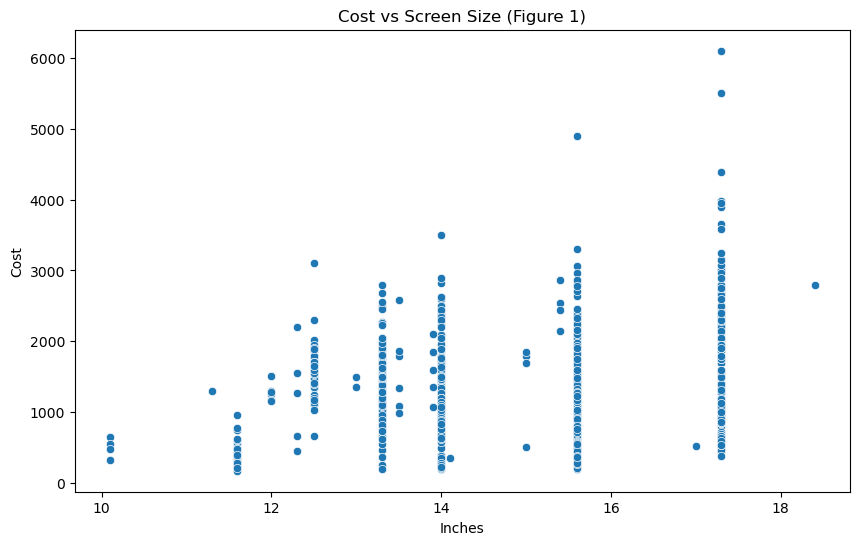

In [168]:
# Generating a scatterplot that compares the cost and screen size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Cost', data=data)
plt.title('Cost vs Screen Size (Figure 1)')
plt.show()


## Cost vs RAM

The relationship between RAM and cost is strongly positive, indicating that as the amount of RAM increases, the laptop's cost also significantly increases. This feature has a profound impact on price since higher RAM directly enhances the machine's performance, making it suitable for more intensive tasks. This is likely the most impactful feature on laptop prices based on the steep slope of the graph.

**Impact Ranking: 1**


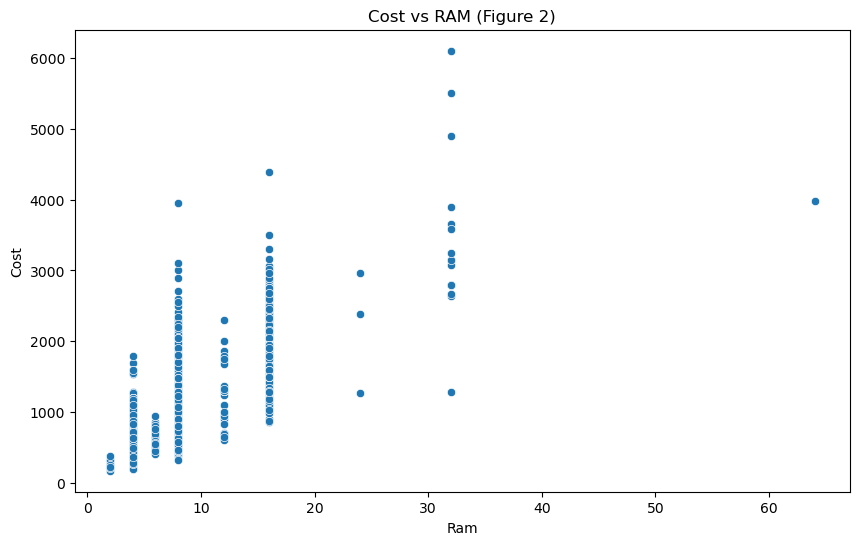

In [169]:
# Generating a scatterplot that compares the cost and RAM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Cost', data=data)
plt.title('Cost vs RAM (Figure 2)')
plt.show()


## Cost vs Storage

While there is a positive trend showing that higher storage capacities generally lead to higher prices, the slope of the increase is less steep compared to RAM. The impact of storage on cost is noticeable but not as pronounced, suggesting that while important, storage adds less incremental value to a laptop's price than RAM or screen size. This could be due to the availability of alternative storage solutions like cloud services.

**Impact Ranking: 4**


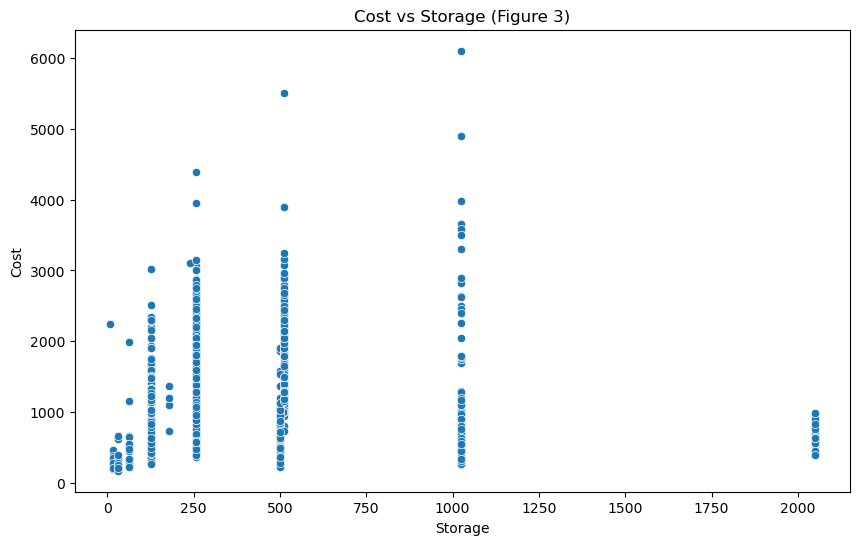

In [170]:
# Generating a scatterplot that compares the cost and storage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Storage', y='Cost', data=data)
plt.title('Cost vs Storage (Figure 3)')
plt.show()


## Cost vs Screen Resolution

Screen resolution shows a significant positive correlation with cost, especially at higher resolutions. This feature significantly impacts the price, as higher resolution screens offer better image quality and are often sought after for professional and entertainment purposes. The visual quality enhancement provided by higher resolutions is highly valued, placing this feature high on the impact scale.

**Impact Ranking: 3**


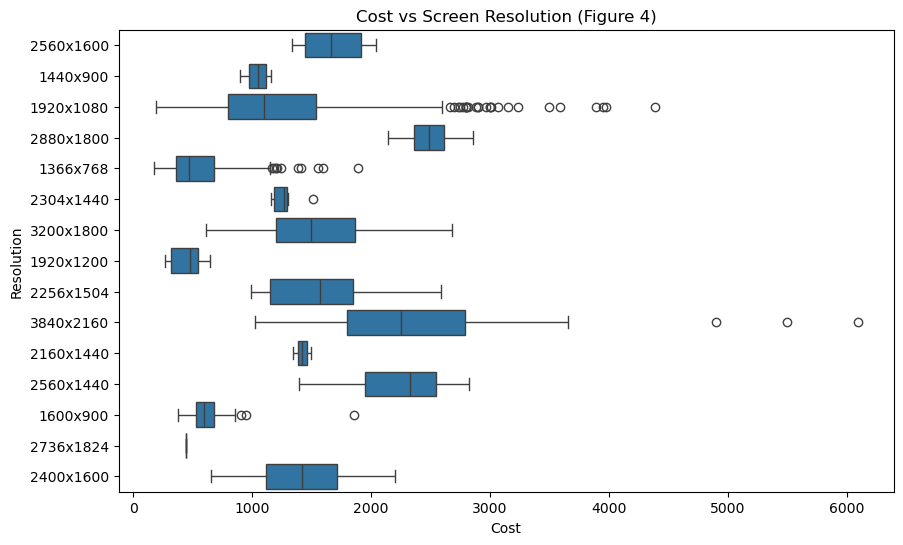

In [171]:
# Creating a new column for Resolution combining Width and Height
data['Resolution'] = data['Width'].astype(str) + 'x' + data['Height'].astype(str)
# Generating a boxplot that compares the cost and screen resolution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cost', y='Resolution', data=data)
plt.title('Cost vs Screen Resolution (Figure 4)')
plt.show()


# **Exploratory Analysis** (Relationships Between Laptop Features and Cost)

In [172]:
# Descriptive statistics for the 'Inches' feature
inches_stats = data['Inches'].describe()

print("Descriptive Statistics for Inches:")
print(inches_stats)


Descriptive Statistics for Inches:
count    1275.000000
mean       15.022902
std         1.429470
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64


## Cost vs Screen Size (Inches)

### Statistics Summary:
- **Mean Screen Size**: 15.02 inches
- **Standard Deviation**: 1.43 inches
- **Range**: 10.1 inches (min) to 18.4 inches (max)
- **Median (50%)**: 15.6 inches

### Observations:
- Most laptops have screen sizes between 14 inches (25th percentile) and 15.6 inches (75th percentile), indicating that mid-sized screens dominate the market.
- Laptops with larger screens (>16 inches) tend to cater to premium users seeking enhanced display experiences, while smaller laptops (<13 inches) target portability and budget-conscious consumers.
- The relatively small standard deviation (1.43) indicates that most laptops cluster around the average screen size of 15 inches.

### Relationship:
- Screen size moderately impacts cost. Larger screens are associated with higher prices, but the effect plateaus beyond 15.6 inches as other factors like resolution and performance take precedence.


In [173]:
# Descriptive statistics for the 'RAM' feature
ram_stats = data['Ram'].describe()

print("Descriptive Statistics for RAM:")
print(ram_stats)


Descriptive Statistics for RAM:
count    1275.000000
mean        8.440784
std         5.097809
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64


## Cost vs RAM

### Statistics Summary:
- **Mean RAM**: 8.44 GB
- **Standard Deviation**: 5.10 GB
- **Range**: 2 GB (min) to 64 GB (max)
- **Median (50%)**: 8 GB

### Observations:
- The majority of laptops offer 8 GB of RAM, as indicated by the median (50% percentile).
- Higher RAM capacities (16 GB and above) correspond to premium models designed for performance-intensive tasks like gaming, video editing, and multitasking.
- The wide range (2 GB to 64 GB) shows that laptops cater to various users, from budget options to high-performance workstations.


### Relationship:
- RAM strongly correlates with cost. Higher RAM is one of the most significant drivers of laptop price, as it directly enhances performance and longevity.


In [174]:
# Descriptive statistics for the 'Storage' feature
storage_stats = data['Storage'].describe()

print("Descriptive Statistics for Storage:")
print(storage_stats)


Descriptive Statistics for Storage:
count    1275.000000
mean      444.517647
std       365.537726
min         8.000000
25%       256.000000
50%       256.000000
75%       512.000000
max      2048.000000
Name: Storage, dtype: float64


## Cost vs Storage

### Statistics Summary:
- **Mean Storage**: 444.52 GB
- **Standard Deviation**: 365.54 GB
- **Range**: 8 GB (min) to 2048 GB (max)
- **Median (50%)**: 256 GB

### Observations:
- The majority of laptops offer 256 GB or 512 GB of storage, catering to general consumer needs.
- Higher storage capacities (e.g., 1 TB and 2 TB) are found in performance or premium models, contributing to higher price points.
- The standard deviation (365.54 GB) indicates diverse offerings, but the influence of storage on price appears less pronounced compared to other features like RAM or resolution.

### Relationship:
- Storage moderately impacts cost, with higher capacities leading to price increases. However, the effect is less steep compared to other features, reflecting the growing reliance on cloud storage and external drives.


In [175]:
# Descriptive statistics for the 'Width' and 'Height' features combined under 'Resolution'
width_stats = data['Width'].describe()
height_stats = data['Height'].describe()

# Combine the statistics into a single DataFrame since two variables are being used
resolution_stats = pd.DataFrame({
    'Width': width_stats,
    'Height': height_stats
})

print("Descriptive Statistics for Resolution:")
print(resolution_stats)


Descriptive Statistics for Resolution:
             Width       Height
count  1275.000000  1275.000000
mean   1900.043922  1073.904314
std     493.346186   283.883940
min    1366.000000   768.000000
25%    1920.000000  1080.000000
50%    1920.000000  1080.000000
75%    1920.000000  1080.000000
max    3840.000000  2160.000000


## Cost vs Screen Resolution

### Statistics Summary for Width:
- **Mean Width**: 1900.04 pixels
- **Standard Deviation**: 493.35 pixels
- **Range**: 1366 pixels (min) to 3840 pixels (max)
- **Median (50%)**: 1920 pixels

### Statistics Summary for Height:
- **Mean Height**: 1073.90 pixels
- **Standard Deviation**: 283.88 pixels
- **Range**: 768 pixels (min) to 2160 pixels (max)
- **Median (50%)**: 1080 pixels

### Observations:
- The majority of laptops feature Full HD resolution (1920x1080 pixels), as indicated by the common median values for both width and height.
- Higher resolutions, such as 4K (3840x2160 pixels), are typically found in premium models aimed at professionals and gamers, indicating a clear trend where both higher width and height contribute to increased costs.
- At the lower end of the spectrum, resolutions of 1366x768 pixels are typical of budget models, providing an entry-level visual experience.

### Relationship:
- Both dimensions of screen resolution (width and height) significantly impact the cost. As either dimension increases, particularly beyond the Full HD benchmark, there is a noticeable jump in price.
- This price variation is driven by consumer demand for sharper, more vibrant displays, which enhances not only the visual experience but also the perceived value of the laptop.


# **Discussion**


## Complexity in Analyzing CPU and GPU Impact on Laptop Prices

While analyzing general features like RAM, screen size, storage, and resolution is relatively straightforward, incorporating CPU and GPU models into the analysis presents significant challenges. This complexity stems from the highly specific and niche nature of these components compared to the more universal nature of other features.

### Why It's Easier to Analyze Features Like RAM, Screen Size, and Resolution

Features such as RAM, screen size, storage capacity, and screen resolution are consistent across most laptops. These features are measured in standardized units (e.g., GB for RAM and storage, inches for screen size, pixels for resolution) and are broadly comparable regardless of the laptop brand or market segment. For instance:
- **RAM**: Laptops with 8 GB or 16 GB of RAM are easily categorized and compared, and their price impact tends to follow clear, predictable patterns.
- **Screen Size**: The difference between a 13-inch and a 15-inch screen is universally understood and straightforward to analyze for its impact on price.
- **Storage**: While storage type (SSD vs. HDD) can vary, the storage capacity in GB is a common metric, and the price impact is typically linear or close to linear.
- **Resolution**: Common standards such as Full HD and 4k make it easier to group and compare laptops based on visual quality, with predictable price increments for higher resolutions.

Because these features are general and widely applicable, their relationship to price is easier to graph and analyze, resulting in clear trends and correlations across a wide variety of laptops.

### The Challenge with CPU and GPU

In contrast, CPUs and GPUs vary dramatically in terms of their specifications, purpose, and performance, making them harder to analyze:
- **Wide Variety**: There are dozens, if not hundreds, of CPU and GPU models on the market, each with unique specifications. For example, CPUs differ by core count, clock speed, generation, and architecture, while GPUs vary in memory size, processing power, and intended use case (gaming, professional work, etc.).
- **Niche Use Cases**: Many CPU and GPU models are tailored to specific user groups. A gaming laptop with a high-end NVIDIA GPU caters to a completely different market segment than a general-purpose laptop with integrated Intel graphics. These niche differences make it challenging to find overarching trends in price impact.
- **Categorical Complexity**: While RAM or screen resolution can be measured on continuous scales, CPUs and GPUs are categorical variables with specific models. Graphing such categories can result in cluttered, difficult-to-read visualizations, especially when outliers (e.g., high-end GPUs driving prices significantly upward) are present.

### Limitations of the Current Analysis

It is important to note that this analysis, while insightful, is not entirely comprehensive. By focusing on general features such as RAM, screen size, storage, and resolution, the analysis excludes the impact of CPUs and GPUs, which are significant contributors to laptop prices. The omission of these variables means that the results provide a **good estimate** of the most valuable features but do not account for all factors that influence price.

For example:
- A high-end gaming laptop with a powerful GPU may appear as an outlier in the dataset, with its price seemingly unrelated to RAM, screen size, or resolution.
- Similarly, laptops designed for professional use, with specialized CPUs or GPUs, might show pricing patterns that deviate significantly from the general trends observed here.

Despite these limitations, the analysis serves as a valuable framework for understanding how general features contribute to laptop pricing. It provides a clear indication of which features are most likely to impact price across a wide range of laptops, making it a **useful approximation** for consumers and manufacturers alike.

### Conclusion

In conclusion, while CPUs and GPUs undoubtedly play a significant role in determining laptop prices, their complexity and variability make them challenging to analyze alongside general features. Instead, the focus on RAM, screen size, storage, and resolution offers a practical estimate of the most valuable features in a laptop. This analysis highlights RAM as the most impactful, followed by screen resolution, screen size, and storage. Although not exhaustive, it provides a solid foundation for understanding how these general features influence laptop pricing.



# **References**

1. Source Data: https://www.kaggle.com/datasets/muhammetvarl/laptop-price
2. *Image source: https://utech.co/blog/the-latest-trends-in-laptop-design/*
3.  Pandas For Data Manipulation
4.  Seaborn For Data Viz
5.  Matplotlib For Data Viz 
6.  Markdown Basic Syntax: https://www.markdownguide.org/basic-syntax/ 
7.  Python Graphing Syntax: https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/